In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/ExcelData/train.xlsx")
df1 = pd.read_excel("/content/drive/MyDrive/ExcelData/test.xlsx")

Mounted at /content/drive


In [2]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score


hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
feature_names = df.columns[:-1].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
y = encoded_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
start = time.perf_counter()

clf = TabNetClassifier()

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], patience=0, max_epochs=700)

end = time.perf_counter()

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.31002 | val_0_accuracy: 0.08993 |  0:00:00s
epoch 1  | loss: 2.17912 | val_0_accuracy: 0.19424 |  0:00:00s
epoch 2  | loss: 2.12135 | val_0_accuracy: 0.1223  |  0:00:00s
epoch 3  | loss: 2.13505 | val_0_accuracy: 0.1223  |  0:00:00s
epoch 4  | loss: 2.0404  | val_0_accuracy: 0.14388 |  0:00:01s
epoch 5  | loss: 2.08225 | val_0_accuracy: 0.16906 |  0:00:01s
epoch 6  | loss: 1.95597 | val_0_accuracy: 0.11151 |  0:00:01s
epoch 7  | loss: 1.90968 | val_0_accuracy: 0.11151 |  0:00:01s
epoch 8  | loss: 1.90565 | val_0_accuracy: 0.06475 |  0:00:02s
epoch 9  | loss: 1.8799  | val_0_accuracy: 0.17626 |  0:00:02s
epoch 10 | loss: 1.88022 | val_0_accuracy: 0.17986 |  0:00:02s
epoch 11 | loss: 1.84322 | val_0_accuracy: 0.22302 |  0:00:02s
epoch 12 | loss: 1.83747 | val_0_accuracy: 0.26619 |  0:00:02s
epoch 13 | loss: 1.79778 | val_0_accuracy: 0.21942 |  0:00:02s
epoch 14 | loss: 1.78508 | val_0_accuracy: 0.26259 |  0:00:03s
epoch 15 | loss: 1.79921 | val_0_accuracy: 0.18345 |  0

In [5]:
clf.save_model('my_model.pkl')

Successfully saved model at my_model.pkl.zip


'my_model.pkl.zip'

In [6]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_excel("/content/drive/MyDrive/ExcelData/test.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install pytorch-tabnet

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


model = TabNetClassifier()
model.load_model('my_model.pkl.zip')

hyperspectral_data1 = df1.iloc[:, :-1].values
labels1 = df1.iloc[:, -1].values
feature_names1 = df1.columns[:-1].values

label_encoder1 = LabelEncoder()
encoded_labels1 = label_encoder1.fit_transform(labels1)

X1 = hyperspectral_data1
y1 = encoded_labels1
predictions = model.predict(X1)
accuracy = accuracy_score(y1, predictions)
print(f"Test accuracy: {accuracy}")
print('Time taken:', end-start, 'sec')

Test accuracy: 0.9252336448598131
Time taken: 120.54436539699999 sec


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


Confusion Matrix:


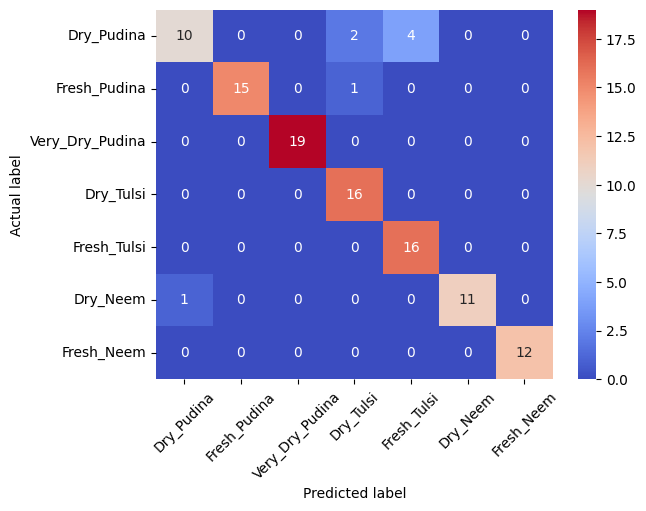

In [11]:
y_test = label_encoder1.inverse_transform(y1)
y_pred = label_encoder1.inverse_transform(predictions)
lb = ['Dry_Pudina', 'Fresh_Pudina', 'Very_Dry_Pudina', 'Dry_Tulsi', 'Fresh_Tulsi', 'Dry_Neem', 'Fresh_Neem']
confusion_mat = confusion_matrix(y_test,y_pred, labels=lb)
print("Confusion Matrix:")
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    xticklabels=lb,
    yticklabels=lb,
)
plt.xticks(rotation=45)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()